Eval the changes

In [1]:
#load in libraries as well as relevant files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
diff_df = pd.read_csv('Test.csv', delimiter=',')
df = pd.read_csv('events_iclr_2019.tsv', delimiter='\t')
df2 = pd.read_csv('events_iclr_2020.tsv', delimiter='\t')
main_df = pd.concat([df, df2])

Get correlation between the change in scores and the Levenshtein distance between edits

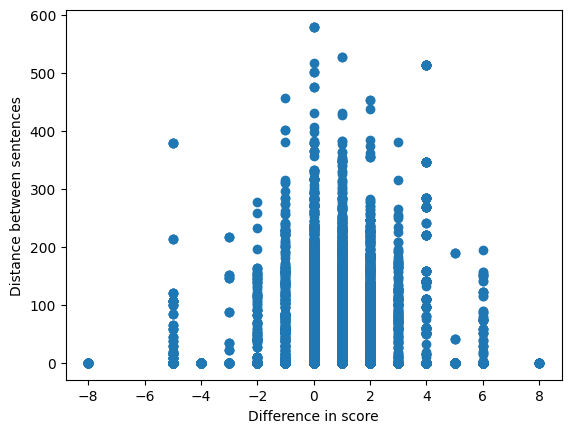

In [2]:
diff_scores = []
diff_distance = []
for i in range(len(diff_df)):
    diff = diff_df.iloc[i]["score2"] - diff_df.iloc[i]["score1"]
    diff_scores.append(diff)
    diff_distance.append(diff_df.iloc[i]["distance"])

#display results
plt.scatter(diff_scores, diff_distance)
plt.xlabel('Difference in score')
plt.ylabel('Distance between sentences')
plt.show()

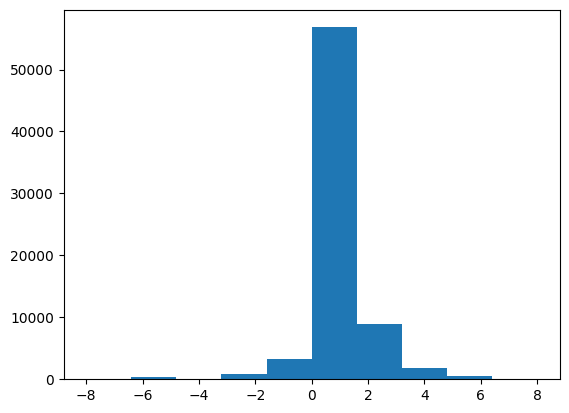

In [3]:
#plot histogram of differences in score
plt.hist(diff_scores)
plt.show()

Both of these figures are based on sentence level, so instead let's look at review level

In [4]:
# look at average change in score per paper
files = diff_df["file1"].unique()
total_diffs = []
diff_scores = []
diff_confidences = []
for file in files:
    file_df = diff_df[diff_df["file1"] == file]
    diffs = file_df["distance"]
    sum = diffs.sum()
    total_diffs.append(sum)
    diff_score = file_df.iloc[0]["score2"] - file_df.iloc[0]["score1"]
    diff_scores.append(diff_score)
    diff_confidence = file_df.iloc[0]["confidence2"] - file_df.iloc[0]["confidence1"]
    diff_confidences.append(diff_confidence)

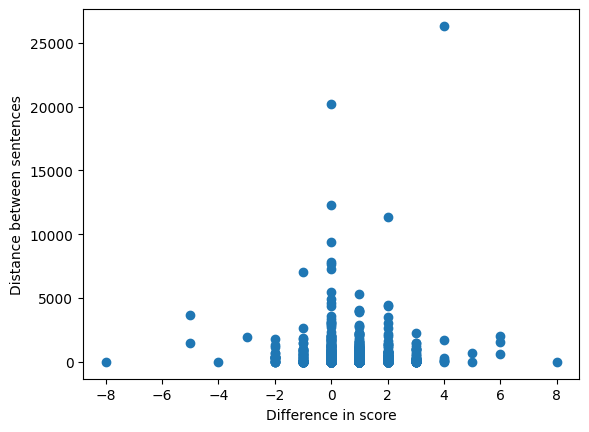

In [5]:
#plot relationship between scores and the total differences in documents
plt.scatter(diff_scores, total_diffs)
plt.xlabel('Difference in score')
plt.ylabel('Distance between sentences')
plt.show()

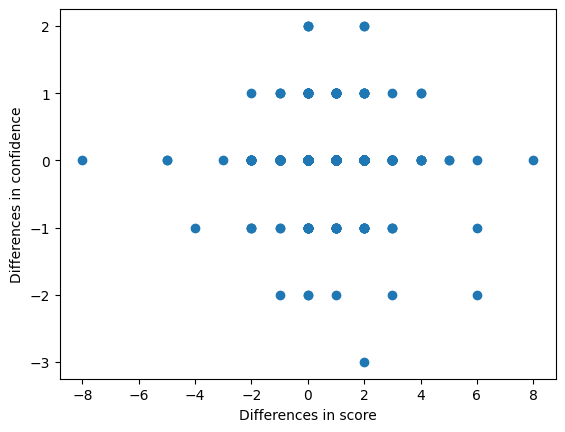

Mean difference in scores: 0.7639000805801772
Mean difference in confidences: 0.0040290088638195


In [6]:
#plot relationships between differences in score and differences in confidence
plt.scatter(diff_scores, diff_confidences)
plt.xlabel("Differences in score")
plt.ylabel("Differences in confidence")
plt.show()
print("Mean difference in scores: {}".format(np.mean(diff_scores)))
print("Mean difference in confidences: {}".format(np.mean(diff_confidences)))

Let's look at the paper where the reviewer's score changed the most and the reviewer's score changed the least.

In [7]:
#look at max and min to see edits
max_score = np.argmax(diff_scores)
entries = diff_df[diff_df["score2"] == 9]
entries = entries[entries["score1"] == 1]
print(len(entries))
for i in range(len(entries)):
    print(entries.iloc[i]["file1"])
    print(entries.iloc[i]["sentence1"])
    print(entries.iloc[i]["file2"])
    print(entries.iloc[i]["sentence2"])
    print("Distance: {}".format(entries.iloc[i]["distance"]))
print(entries.iloc[0]["confidence1"])
print(entries.iloc[0]["confidence2"])

#look at min
min_score = np.argmin(diff_scores)
entries = diff_df[diff_df["score2"] == 1]
entries = entries[entries["score1"] == 9]
for i in range(len(entries)):
    print(entries.iloc[i]["file1"])
    print(entries.iloc[i]["sentence1"])
    print()
    print(entries.iloc[i]["file2"])
    print(entries.iloc[i]["sentence2"])

18
data/text/iclr_2019/B1xsqj09Fm/comment_SJl68_Hx37_0.json
This paper present extensions of the Self-Attention Generative Adversarial Network approach SAGAN, leading to impressive images generations conditioned on imagenet classes.
data/text/iclr_2019/B1xsqj09Fm/comment_SJl68_Hx37_1.json
This paper present extensions of the Self-Attention Generative Adversarial Network approach SAGAN, leading to impressive images generations conditioned on imagenet classes.
Distance: 0
data/text/iclr_2019/B1xsqj09Fm/comment_SJl68_Hx37_0.json
The key components of the approach are :- increasing the batch size by a factor 8- augmenting the width of the networks by 50%
data/text/iclr_2019/B1xsqj09Fm/comment_SJl68_Hx37_1.json
The key components of the approach are :- increasing the batch size by a factor 8- augmenting the width of the networks by 50%
Distance: 0
data/text/iclr_2019/B1xsqj09Fm/comment_SJl68_Hx37_0.json
These first two elements result in an Inception score (IS) boost from 52 to 93.
data/tex

In [8]:
#look at papers where authors responded
diff_author_scores = []
diff_author_distance = []
diff_author_resp = []
total_author_resp = []
total_diff = []
absolute_score = []
forums = main_df['forum'].unique()
for f in forums:
    data = main_df[main_df['forum'] == f]
    d_authors = data[data['initiator'] == "Authors"]
    author_diffs = diff_df[diff_df['forum'] == f]
    total = 0
    for i in range(len(author_diffs)):
        diff_author_resp.append(len(d_authors))
        diff = author_diffs.iloc[i]["score2"] - author_diffs.iloc[i]["score1"]
        diff_author_scores.append(diff)
        diff_author_distance.append(author_diffs.iloc[i]["distance"])
        total += author_diffs.iloc[i]["distance"]
        absolute_score.append(author_diffs.iloc[0]["score2"])
    total_author_resp.append(len(d_authors))
    total_diff.append(total)


34


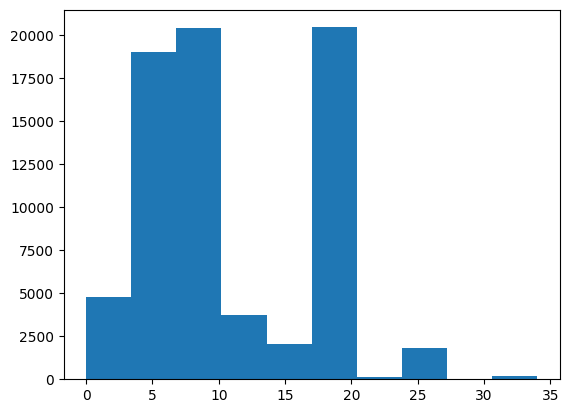

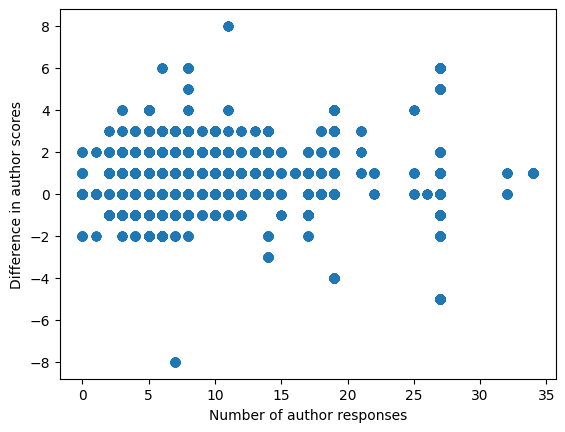

In [9]:
print(np.max(diff_author_resp))
plt.hist(diff_author_resp)
plt.show()
plt.scatter(diff_author_resp, diff_author_scores)
plt.xlabel("Number of author responses")
plt.ylabel("Difference in author scores")
plt.show()

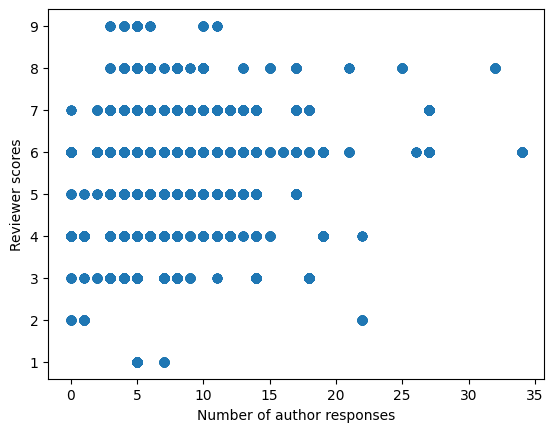

In [10]:
#does the frequency of author responses matter?
#plot between the number of author responses and the absolute score that they give it
plt.scatter(diff_author_resp, absolute_score)
plt.xlabel("Number of author responses")
plt.ylabel("Reviewer scores")
plt.show()

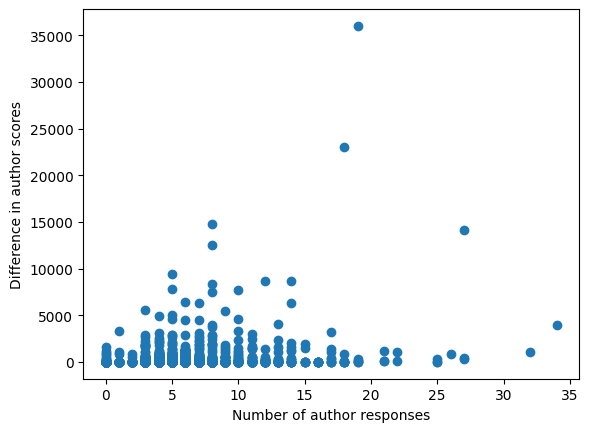

In [11]:
#plot between the number of author responses and the difference in score between the two documents
plt.scatter(total_author_resp, total_diff)
plt.xlabel("Number of author responses")
plt.ylabel("Difference in author scores")
plt.show()

72690


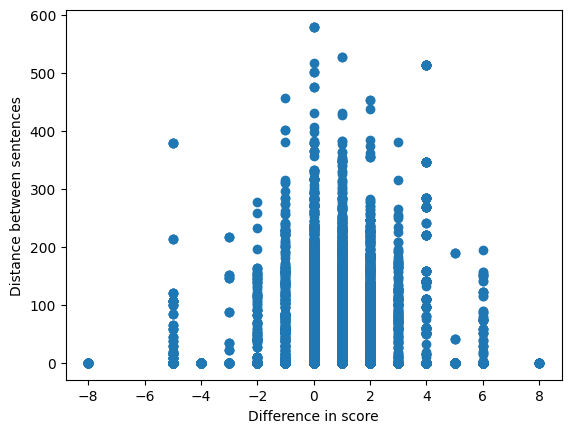

In [12]:
#plot between the difference in Levenshtein distance
plt.scatter(diff_author_scores, diff_author_distance)
print(len(diff_author_scores))
plt.xlabel('Difference in score')
plt.ylabel('Distance between sentences')
plt.show()